In [1]:
import torch
from transformers import AutoModelForCausalLM
from transformers import AutoTokenizer, EsmForMaskedLM
from tokenizers import Tokenizer
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

/opt/anaconda3/envs/MachLearn/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with open('/Users/johnhutchens/Desktop/Practicum/Data/ems_pbd_long_matrices.pickle',
           'rb') as f:
    esm_dict = pickle.load(f)

with open('/Users/johnhutchens/Desktop/Practicum/Data/pgM_pbd_long_matrices.pickle',
           'rb') as f:
    pg_dict = pickle.load(f)

In [3]:
seq_esm_5 = esm_dict[5]['sequence']
seq_pg_5 = pg_dict[5]['sequence']

In [4]:
print(seq_esm_5)
print(seq_pg_5)

print(len(seq_esm_5))
print(len(seq_pg_5))

MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAAELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL
MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSAAELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL
166
166


In [5]:
lp_esm_matrix5 = esm_dict[90]['log_probs']

lp_pg_matrix5 = pg_dict[90]['log_probs']

for i in range(15):
    print(torch.sum(torch.exp(lp_esm_matrix5[i])))
    print(torch.sum(torch.exp(lp_pg_matrix5[i])))

tensor(1.0000)
tensor(0.9852)
tensor(1.0000)
tensor(0.9996)
tensor(1.0000)
tensor(0.9993)
tensor(1.0000)
tensor(0.9998)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9993)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9998)
tensor(1.0000)
tensor(0.9999)
tensor(1.0000)
tensor(0.9998)
tensor(1.0000)
tensor(0.9998)
tensor(1.0000)
tensor(0.9999)


In [6]:
lp_esm_matrix5[0]

tensor([-1.1557e+01, -1.4627e+01, -1.3542e+01, -1.3628e+01, -1.2969e+01,
        -1.3552e+01, -1.4000e+01, -1.2408e+01, -1.2500e+01, -1.1844e+01,
        -7.2953e-05, -1.2834e+01, -1.1725e+01, -1.2938e+01, -1.2986e+01,
        -1.1974e+01, -1.1698e+01, -1.1604e+01, -1.4222e+01, -1.3845e+01])

In [7]:
A = lp_esm_matrix5
B = lp_pg_matrix5

eA = torch.exp(A)
eB = torch.exp(B)

kl_div = torch.sum(eA[100] * (A[100] - B[100]))
kl_div

tensor(2.4789)

In [8]:
A = lp_esm_matrix5
B = lp_pg_matrix5

eA = torch.exp(A)
eB = torch.exp(B)

n = len(A)

kl_list = []
for i in range(n):
    kl_div = torch.sum(eA[i] * (A[i] - B[i]))
    kl_list.append(kl_div)

In [9]:
print(np.array(kl_list).mean())
kl_list

2.0190282


[tensor(1.0810),
 tensor(2.5869),
 tensor(3.0954),
 tensor(2.6287),
 tensor(2.4475),
 tensor(3.9192),
 tensor(2.3639),
 tensor(1.9817),
 tensor(2.1125),
 tensor(3.1573),
 tensor(2.6256),
 tensor(3.0129),
 tensor(2.6217),
 tensor(2.9104),
 tensor(2.3401),
 tensor(2.5587),
 tensor(2.9826),
 tensor(3.0287),
 tensor(2.3015),
 tensor(3.1349),
 tensor(2.8525),
 tensor(2.6922),
 tensor(1.9065),
 tensor(3.4042),
 tensor(3.0590),
 tensor(2.7774),
 tensor(2.5205),
 tensor(0.8629),
 tensor(2.6327),
 tensor(0.5573),
 tensor(2.1212),
 tensor(1.2076),
 tensor(1.2943),
 tensor(2.0091),
 tensor(2.1687),
 tensor(1.3239),
 tensor(2.2415),
 tensor(2.6210),
 tensor(2.7466),
 tensor(1.3369),
 tensor(1.7449),
 tensor(2.3863),
 tensor(2.9879),
 tensor(1.7299),
 tensor(2.5202),
 tensor(2.2166),
 tensor(2.9489),
 tensor(2.4222),
 tensor(1.5617),
 tensor(2.0512),
 tensor(3.1390),
 tensor(3.0235),
 tensor(2.9662),
 tensor(3.3736),
 tensor(2.6687),
 tensor(2.7705),
 tensor(2.7229),
 tensor(2.9338),
 tensor(2.3726

In [10]:
kl_dict = dict()

for j in range(100):
    
    A = esm_dict[j]['log_probs']
    B = pg_dict[j]['log_probs']

    eA = torch.exp(A)
    eB = torch.exp(B)

    n = len(A)

    kl_list = []
    for i in range(n):
        kl_div = torch.sum(eA[i] * (A[i] - B[i]))
        kl_list.append(kl_div)
    kl_dict[j] = kl_list

In [11]:
for i in kl_dict:
    print(kl_dict[i])
    print(torch.tensor(kl_dict[i]).mean())

[tensor(1.3127), tensor(1.8193), tensor(2.4795), tensor(2.2000), tensor(2.3907), tensor(1.2070), tensor(2.3073), tensor(3.6391), tensor(1.6163), tensor(1.2596), tensor(2.5235), tensor(1.3678), tensor(0.6786), tensor(2.5950), tensor(4.0957), tensor(1.5754), tensor(1.1907), tensor(2.1687), tensor(2.8950), tensor(1.4351), tensor(2.7676), tensor(1.7690), tensor(1.9968), tensor(2.4270), tensor(2.8494), tensor(2.5862), tensor(2.0747), tensor(2.5765), tensor(3.2366), tensor(1.9961), tensor(2.6798), tensor(2.5546), tensor(2.3122), tensor(1.3732), tensor(2.3919), tensor(1.9023), tensor(3.5989), tensor(2.2540), tensor(1.7907), tensor(2.4086), tensor(1.2291), tensor(1.9351), tensor(1.7948), tensor(1.0758), tensor(0.6929), tensor(0.3170), tensor(0.8272), tensor(1.4607), tensor(1.1005), tensor(1.1778), tensor(1.0459), tensor(2.2737), tensor(2.2130), tensor(1.5065), tensor(1.8596), tensor(2.6639), tensor(1.1147), tensor(1.5698), tensor(1.5606), tensor(1.5827), tensor(2.0480), tensor(0.8600), tensor(

In [12]:
l1_dict = dict()

for j in range(100):
    
    A = esm_dict[j]['log_probs']
    B = pg_dict[j]['log_probs']

    eA = torch.exp(A)
    eB = torch.exp(B)

    n = len(A)

    l1_list = []
    for i in range(n):
        l1_diff = torch.sum( torch.abs(eA[i] - eB[i]))/20
        # print(eA[i],eB[i], l1_diff)
        l1_list.append(l1_diff)
    l1_dict[j] = l1_list

In [13]:
#l1_dict
for i in l1_dict:
    print(l1_dict[i])
    print(torch.tensor(l1_dict[i]).min())
    print(torch.tensor(l1_dict[i]).mean())
    print(torch.tensor(l1_dict[i]).max())

[tensor(0.0732), tensor(0.0682), tensor(0.0911), tensor(0.0852), tensor(0.0869), tensor(0.0598), tensor(0.0887), tensor(0.0885), tensor(0.0665), tensor(0.0588), tensor(0.0888), tensor(0.0701), tensor(0.0480), tensor(0.0862), tensor(0.0979), tensor(0.0741), tensor(0.0662), tensor(0.0878), tensor(0.0937), tensor(0.0756), tensor(0.0936), tensor(0.0733), tensor(0.0820), tensor(0.0905), tensor(0.0868), tensor(0.0924), tensor(0.0711), tensor(0.0891), tensor(0.0934), tensor(0.0864), tensor(0.0884), tensor(0.0910), tensor(0.0900), tensor(0.0748), tensor(0.0834), tensor(0.0740), tensor(0.0965), tensor(0.0894), tensor(0.0834), tensor(0.0909), tensor(0.0696), tensor(0.0822), tensor(0.0768), tensor(0.0660), tensor(0.0539), tensor(0.0312), tensor(0.0579), tensor(0.0770), tensor(0.0649), tensor(0.0696), tensor(0.0667), tensor(0.0877), tensor(0.0888), tensor(0.0765), tensor(0.0834), tensor(0.0903), tensor(0.0686), tensor(0.0777), tensor(0.0789), tensor(0.0723), tensor(0.0851), tensor(0.0606), tensor(

In [14]:
print(l1_dict[80])
print(torch.tensor(l1_dict[80]).mean())

[tensor(0.0637), tensor(0.0905), tensor(0.0925), tensor(0.0878), tensor(0.0882), tensor(0.0972), tensor(0.0898), tensor(0.0795), tensor(0.0808), tensor(0.0959), tensor(0.0932), tensor(0.0938), tensor(0.0918), tensor(0.0939), tensor(0.0905), tensor(0.0928), tensor(0.0909), tensor(0.0951), tensor(0.0897), tensor(0.0944), tensor(0.0943), tensor(0.0937), tensor(0.0858), tensor(0.0958), tensor(0.0948), tensor(0.0924), tensor(0.0899), tensor(0.0516), tensor(0.0902), tensor(0.0397), tensor(0.0884), tensor(0.0722), tensor(0.0736), tensor(0.0928), tensor(0.0849), tensor(0.0908), tensor(0.0968), tensor(0.0892), tensor(0.0905), tensor(0.0576), tensor(0.0802), tensor(0.0911), tensor(0.0926), tensor(0.0696), tensor(0.0935), tensor(0.0810), tensor(0.0950), tensor(0.0867), tensor(0.0859), tensor(0.0860), tensor(0.0958), tensor(0.0935), tensor(0.0944), tensor(0.0955), tensor(0.0938), tensor(0.0943), tensor(0.0912), tensor(0.0913), tensor(0.0914), tensor(0.0901), tensor(0.0767), tensor(0.0638), tensor(

In [15]:
A = esm_dict[5]['log_probs']
B = pg_dict[5]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

print(np.array(eA)[10])
print(np.sum(np.array(eA[10])))

print(np.array(eB)[10])
print(np.sum(np.array(eB[10])))


[2.8588984e-05 5.3379858e-06 2.3651492e-05 9.9920672e-01 3.8690500e-06
 8.8021727e-05 1.1718168e-05 5.7387028e-06 2.8385621e-04 3.0787847e-05
 2.9285782e-06 1.3385606e-05 4.6293819e-05 1.1535367e-04 3.9360872e-05
 3.8951082e-05 6.7415617e-06 2.0182133e-05 4.2643369e-06 9.1224902e-06]
0.9999849
[0.06812418 0.00265654 0.05931751 0.06606047 0.03812567 0.08364854
 0.02757931 0.05696506 0.08017687 0.10032676 0.02281944 0.05622928
 0.04091536 0.03958881 0.05854955 0.05936097 0.04915343 0.04856151
 0.0115217  0.03010196]
0.999783


/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/3026323315.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  print(np.array(eA)[10])
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/3026323315.py:8: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  print(np.sum(np.array(eA[10])))
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/3026323315.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/2016967927.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  probs1 = np.array(eA)[10]
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/2016967927.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  probs2 = np.array(eB)[10]


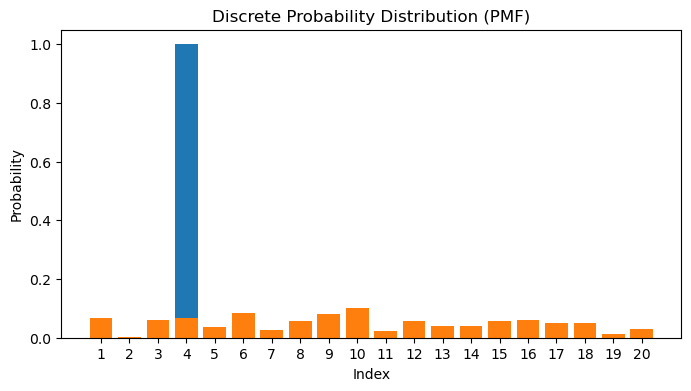

In [17]:
probs1 = np.array(eA)[10]
probs2 = np.array(eB)[10]

# normalize to make sure it sums to 1
dist1 = probs1 / probs1.sum()
dist2 = probs2 / probs2.sum()

# make x-axis for categories

x = torch.arange(1, len(dist1) + 1)

# plot as bar chart (PMF)
plt.figure(figsize=(8, 4))
plt.bar(x, dist1)
plt.bar(x,dist2)
plt.xticks(x)
plt.xlabel("Index")
plt.ylabel("Probability")
plt.title("Discrete Probability Distribution (PMF)")
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/4281070724.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(10)]


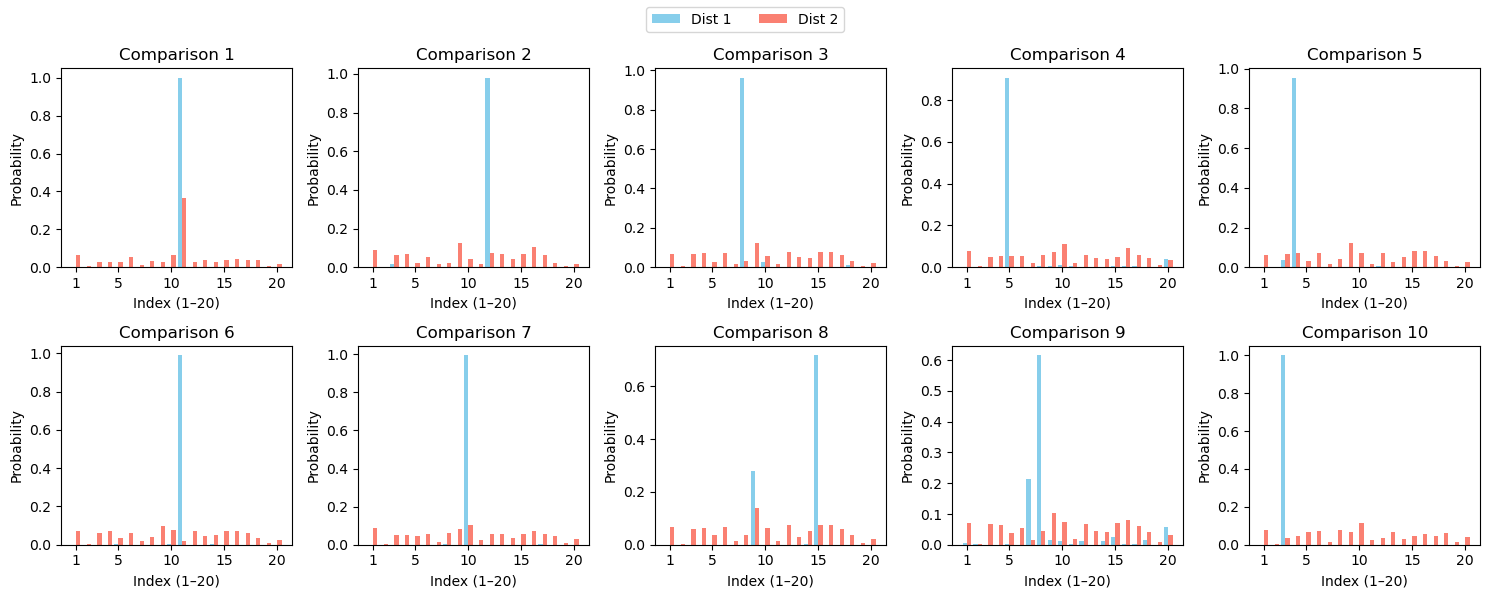

In [18]:
A = esm_dict[5]['log_probs']
B = pg_dict[5]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(10)]

# Plot settings
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist1, dist2 = pairs10[i]
    ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x + bar_width/2, dist2, width=bar_width, label="Dist 2", color="salmon")
    ax.set_title(f"Comparison {i+1}")
    ax.set_xlabel("Index (1–20)")
    ax.set_ylabel("Probability")
    ax.set_xticks([1, 5, 10, 15, 20])  # fewer ticks for readability
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/2365141684.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(10,20)]


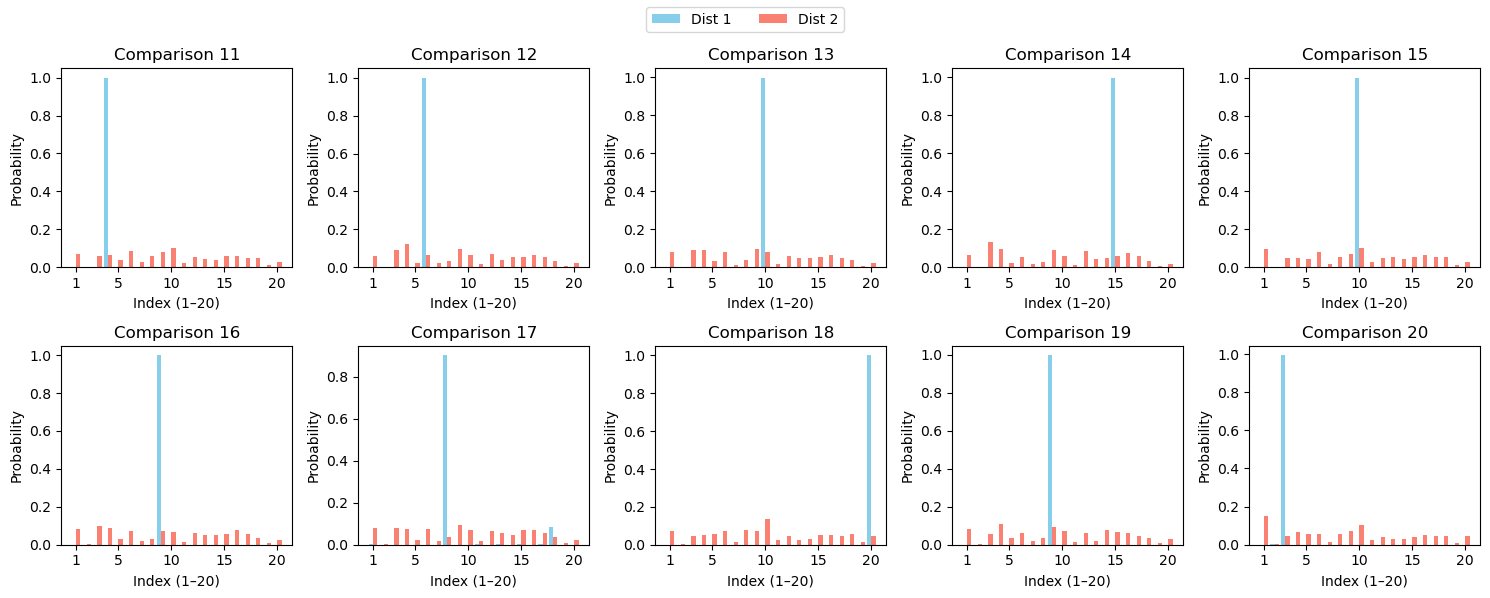

In [19]:
A = esm_dict[5]['log_probs']
B = pg_dict[5]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(10,20)]

# Plot settings
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist1, dist2 = pairs10[i]
    ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x + bar_width/2, dist2, width=bar_width, label="Dist 2", color="salmon")
    ax.set_title(f"Comparison {i+11}")
    ax.set_xlabel("Index (1–20)")
    ax.set_ylabel("Probability")
    ax.set_xticks([1, 5, 10, 15, 20])  # fewer ticks for readability
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/1758843605.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(100,110)]


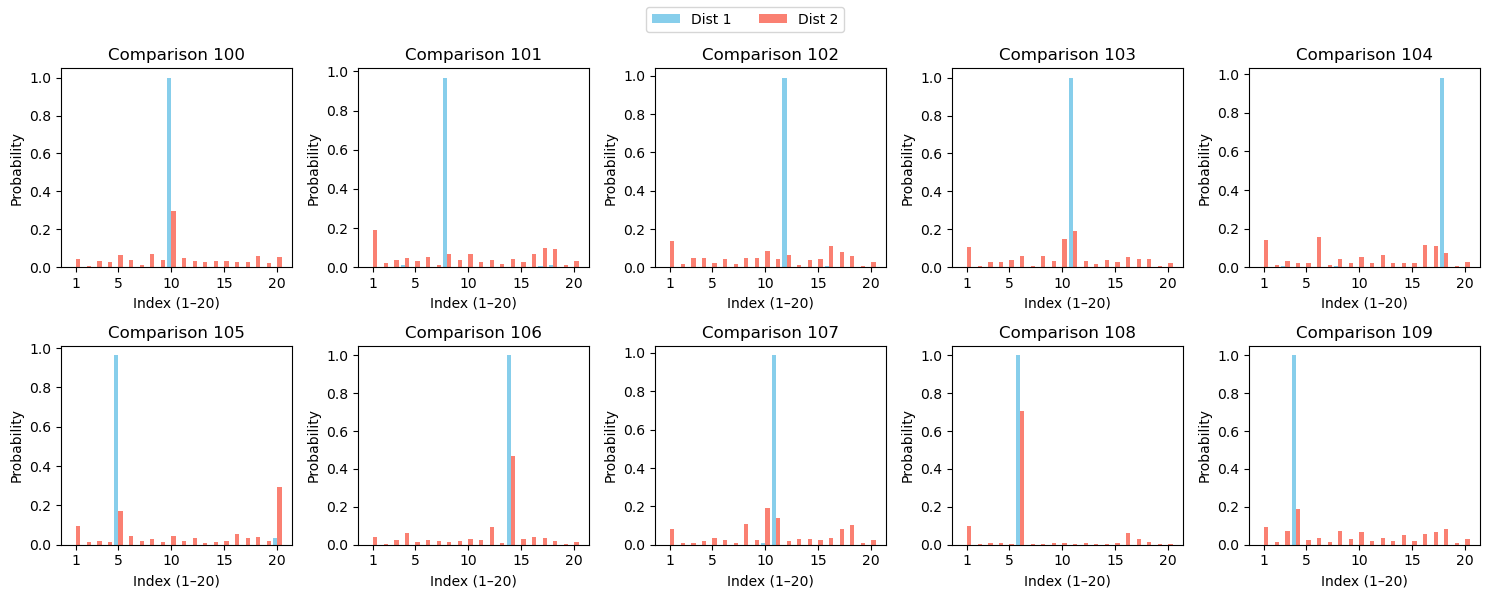

In [20]:
A = esm_dict[5]['log_probs']
B = pg_dict[5]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(100,110)]

# Plot settings
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist1, dist2 = pairs10[i]
    ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x + bar_width/2, dist2, width=bar_width, label="Dist 2", color="salmon")
    ax.set_title(f"Comparison {i+100}")
    ax.set_xlabel("Index (1–20)")
    ax.set_ylabel("Probability")
    ax.set_xticks([1, 5, 10, 15, 20])  # fewer ticks for readability
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/408260462.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(150,160)]


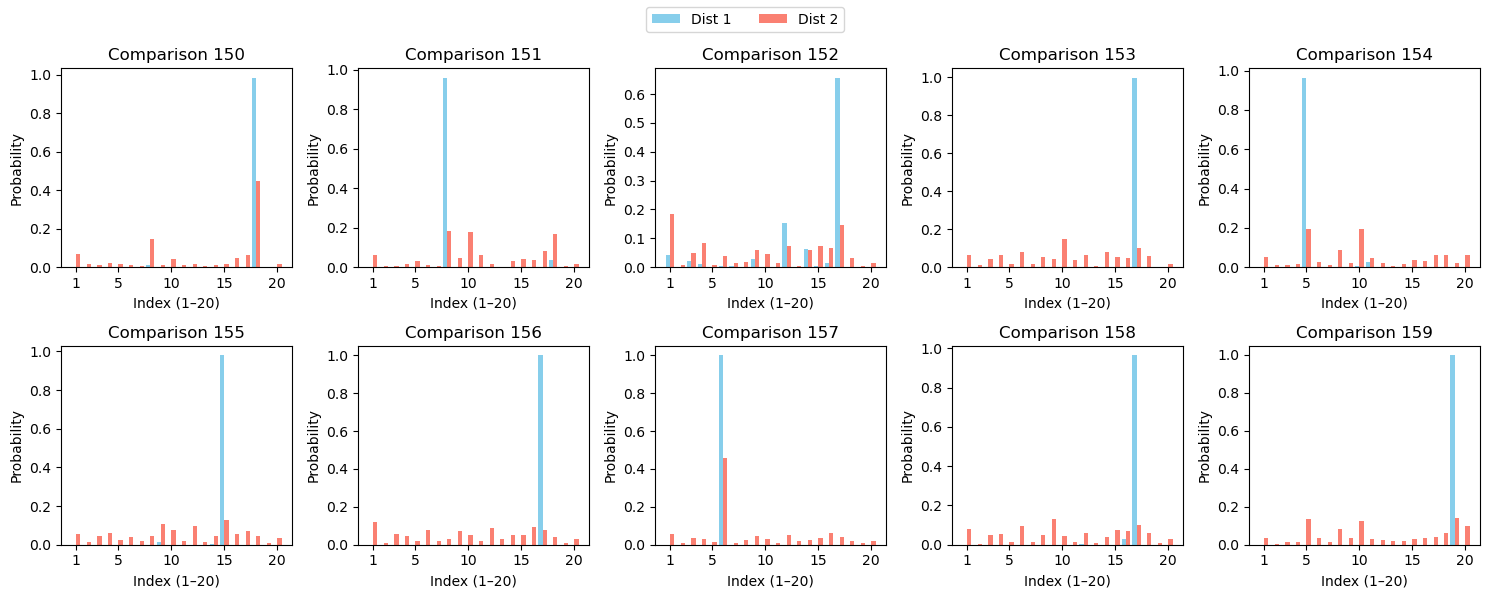

In [21]:
A = esm_dict[5]['log_probs']
B = pg_dict[5]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

pairs10 = [(np.array(eA)[i], np.array(eB)[i]) for i in range(150,160)]

# Plot settings
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
bar_width = 0.4
x = torch.arange(1, 21)

for i, ax in enumerate(axes):
    dist1, dist2 = pairs10[i]
    ax.bar(x - bar_width/2, dist1, width=bar_width, label="Dist 1", color="skyblue")
    ax.bar(x + bar_width/2, dist2, width=bar_width, label="Dist 2", color="salmon")
    ax.set_title(f"Comparison {i+150}")
    ax.set_xlabel("Index (1–20)")
    ax.set_ylabel("Probability")
    ax.set_xticks([1, 5, 10, 15, 20])  # fewer ticks for readability
    ax.tick_params(axis='x', rotation=0)

# Add a single legend for all subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/2900150406.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.array(eA)[10],
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/2900150406.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.array(eB)[10]


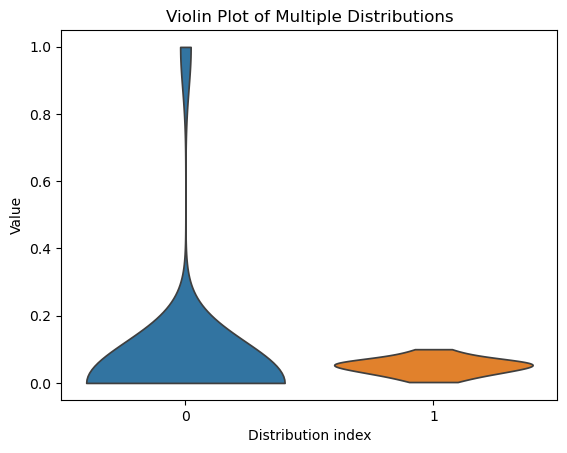

In [22]:
A = esm_dict[5]['log_probs']
#B = esm_dict[6]['log_probs']
B = pg_dict[5]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists = [
    np.array(eA)[10],
    np.array(eB)[10]
]

# Create violin plot
sns.violinplot(data=dists, cut=0, inner=None)

# Label axes
plt.xlabel('Distribution index')
plt.ylabel('Value')
plt.title('Violin Plot of Multiple Distributions')

plt.show()

In [23]:
eA = torch.exp(A)
eB = torch.exp(B)

torch.min(eB)

tensor(0.0009)

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/485347218.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  dist1 = np.array(eA)[98]
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/485347218.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  dist2 = np.array(eB)[98]


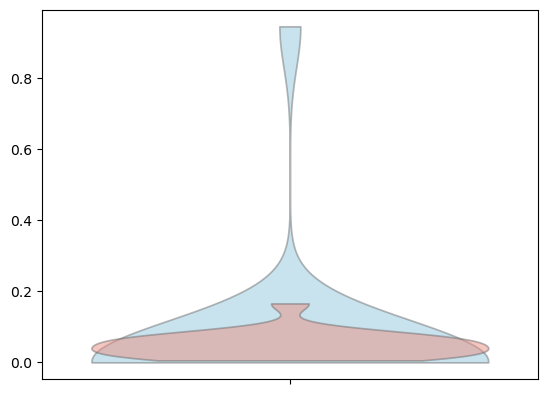

In [24]:
# Two distributions
dist1 = np.array(eA)[98]
dist2 = np.array(eB)[98]

sns.violinplot(y=dist1, color="skyblue", alpha=0.5, cut=0, inner=None)
sns.violinplot(y=dist2, color="salmon", alpha=0.5, cut=0, inner=None)

plt.title("")
plt.ylabel("")
plt.show()

In [25]:
A = esm_dict[3]['log_probs']
B = pg_dict[3]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists1 = []
dists2 = []
for i in range(len(A)):
    da = np.array(eA[i])
    db = np.array(eB[i])
    dists1.append(da)
    dists2.append(db)



/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/2506594936.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  da = np.array(eA[i])
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/2506594936.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  db = np.array(eB[i])


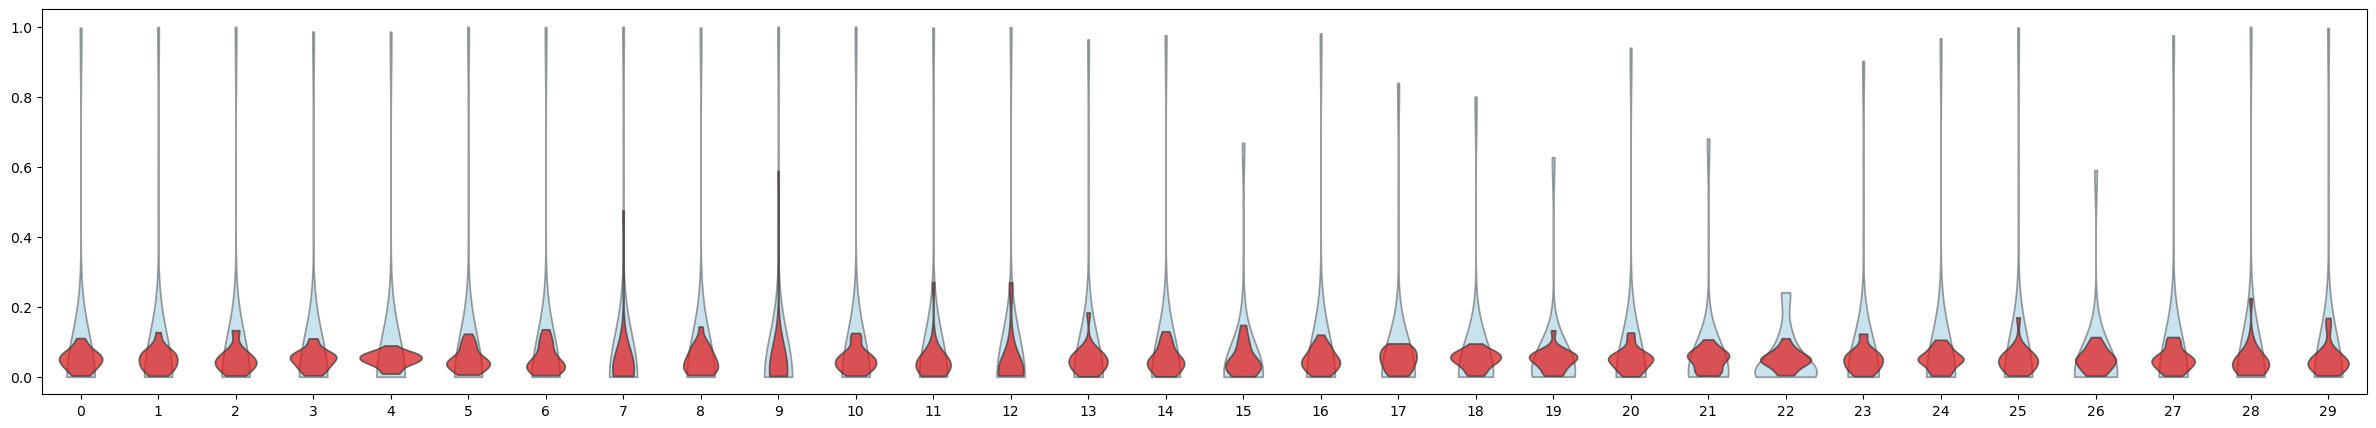

In [26]:
plt.figure(figsize=(30, 5))
sns.violinplot(data=dists1[20:50], color="skyblue", alpha=0.5, inner=None, cut=0)
sns.violinplot(data=dists2[20:50], color="red", alpha=0.75, inner=None, cut=0)
plt.title("")
plt.ylabel("")
plt.show()

/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/3143873620.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  da = np.array(eA[i])
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/3143873620.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  db = np.array(eB[i])


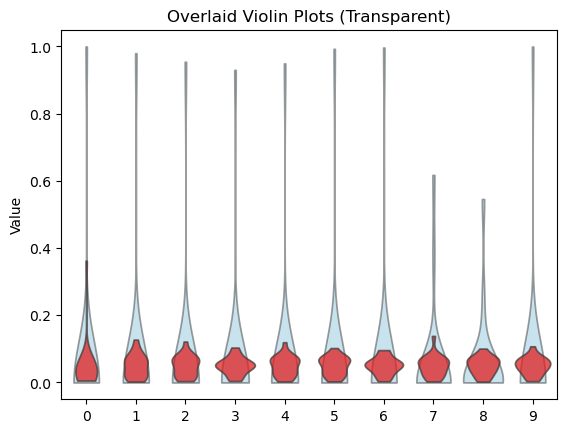

In [27]:
A = esm_dict[21]['log_probs']
B = pg_dict[21]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists1 = []
dists2 = []
for i in range(len(A)):
    da = np.array(eA[i])
    db = np.array(eB[i])
    dists1.append(da)
    dists2.append(db)

sns.violinplot(data=dists1[0:10], color="skyblue", alpha=0.5, inner=None, cut=0)
sns.violinplot(data=dists2[0:10], color="red", alpha=0.75, inner=None, cut=0)

plt.title("Overlaid Violin Plots (Transparent)")
plt.ylabel("Value")
plt.show()

In [28]:
print(esm_dict[21]['log_probs'][0][1:10])
print(esm_dict[97]['log_probs'][0][1:10])

tensor([-14.6385, -13.3915, -13.6057, -12.7970, -13.1115, -13.8592, -12.2731,
        -11.9722, -11.8724])
tensor([-15.1603, -13.7140, -13.8830, -13.0869, -13.6199, -14.1788, -12.5288,
        -12.5929, -11.9967])


PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKASCLYGQLPKFQDGDLTLYQSNTILRHLGRTLGLYGKDQQEAALVDMVNDGVEDLRCKYISLIYTNYEAGKDDYVKALPGQLKPFETLLSQNQGGKTFIVGDQISFADYNLLDLLLIHEVLAPGCLDAFPLLSAYVGRLSARPKLKAFLASPEYVNLPINGNGKQ
MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSELDKAIGRNTNGVITKDEAEKLFNQDVDAAVRGILRNAKLKPVYDSLDAVRRAALINMVFQMGETGVAGFTNSLRMLQQKRWDEAAVNLAKSRWYNQTPNRAKRVITTFRTGTWDAYKNL


/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/3406712376.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  da = np.array(eA[i])
/var/folders/30/5r4_75_n4bz34nyphw8tfv3m0000gn/T/ipykernel_2470/3406712376.py:14: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  db = np.array(eB[i])


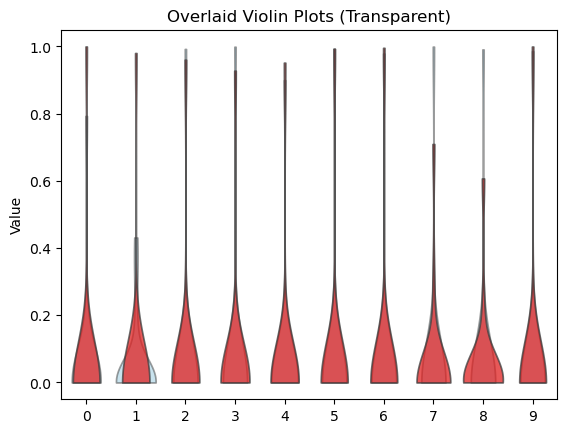

In [29]:
print(esm_dict[17]['sequence'])
print(esm_dict[1]['sequence'])

A = esm_dict[17]['log_probs']
B = esm_dict[1]['log_probs']

eA = torch.exp(A)
eB = torch.exp(B)

dists1 = []
dists2 = []
for i in range(20):
    da = np.array(eA[i])
    db = np.array(eB[i])
    dists1.append(da)
    dists2.append(db)

sns.violinplot(data=dists1[0:10], color="skyblue", alpha=0.5, inner=None, cut=0)
sns.violinplot(data=dists2[0:10], color="red", alpha=0.75, inner=None, cut=0)

#cut off y-axis at zero

plt.title("Overlaid Violin Plots (Transparent)")
plt.ylabel("Value")
plt.show()

In [30]:
A = esm_dict[21]['log_probs']
print(A[10])

eA = torch.exp(A)
print(eA[10])

tensor([-1.0470e+01, -1.2294e+01, -1.0868e+01, -7.6313e-04, -1.2674e+01,
        -9.2160e+00, -1.1557e+01, -1.2295e+01, -8.2046e+00, -1.0543e+01,
        -1.2924e+01, -1.1268e+01, -1.0120e+01, -9.1488e+00, -1.0254e+01,
        -1.0150e+01, -1.1869e+01, -1.0828e+01, -1.2485e+01, -1.1727e+01])
tensor([2.8388e-05, 4.5801e-06, 1.9066e-05, 9.9924e-01, 3.1303e-06, 9.9432e-05,
        9.5733e-06, 4.5754e-06, 2.7338e-04, 2.6388e-05, 2.4396e-06, 1.2775e-05,
        4.0278e-05, 1.0634e-04, 3.5200e-05, 3.9081e-05, 7.0045e-06, 1.9827e-05,
        3.7842e-06, 8.0718e-06])
